<a href="https://colab.research.google.com/github/fopdf/Computational-Mathematics/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

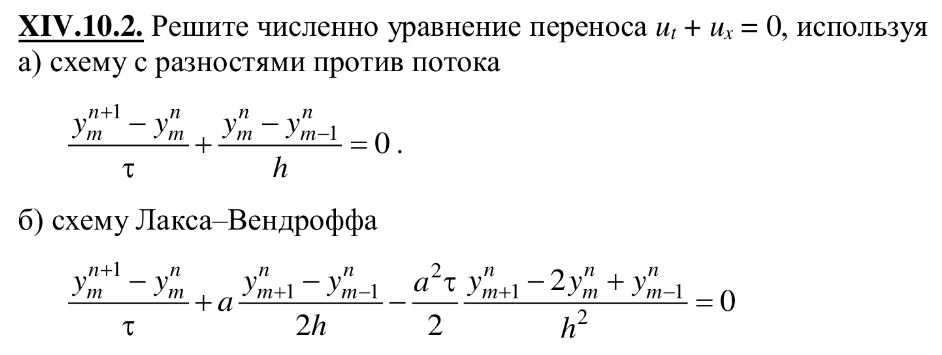

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Задание начальных данных

L = 20
h = 0.5
T_f = 18


def y_0(x):
    return math.sin(4*math.pi*x/L)

In [ ]:
#Генерация сетки
def gen_grid(CFL):
    tau_i = h * CFL
    x = np.arange(0, L + h/2, h)
    t = np.arange(0, T_f + tau_i/2, tau_i)
    return (tau_i, x, t)

In [ ]:
#Рисование требуемых графиков
def plot_graph(func, CFL_i):
    
    tau_g, x_g, t_g = gen_grid(CFL_i)
    
    y = func(t_g, x_g, tau_g)

    fig, graphs = plt.subplots(5)
    for i, T in enumerate([0, 5, 10, 15, 18]):
        graphs[i].plot(x_g, y[int(T/tau_g)])
        graphs[i].grid()
        graphs[i].set_xlim(0, L)
        graphs[i].set_xlabel('x')
        graphs[i].set_ylabel('y')
        graphs[i].set_title(f'T={T}')

    fig.set_figwidth(15)
    fig.set_figheight(20)
    plt.subplots_adjust(hspace=0.6)
    
    #plt.show()

Cхема с разностями против потока:\
$\frac{y_m^{n+1} - y_m^n}{\tau} + \frac{y_m^n - y_{m-1}^n}{h} =0 $\
$y_m^{n+1} =  y_m^n - \frac{\tau}{h}*(y_m^n - y_{m-1}^n) =0 $


In [ ]:
def scheme_1(t,x,tau):
    y = np.zeros([len(t), len(x)])
    y[0] = [y_0(x_i) for x_i in x]
    for i in range(len(t)-1):
        for j in range(1, len(x)):
            y[i+1][j] = y[i][j]-(tau/h)*(y[i][j]-y[i][j-1])
        y[i+1][0] = y[i+1][len(x)-1]
    return y

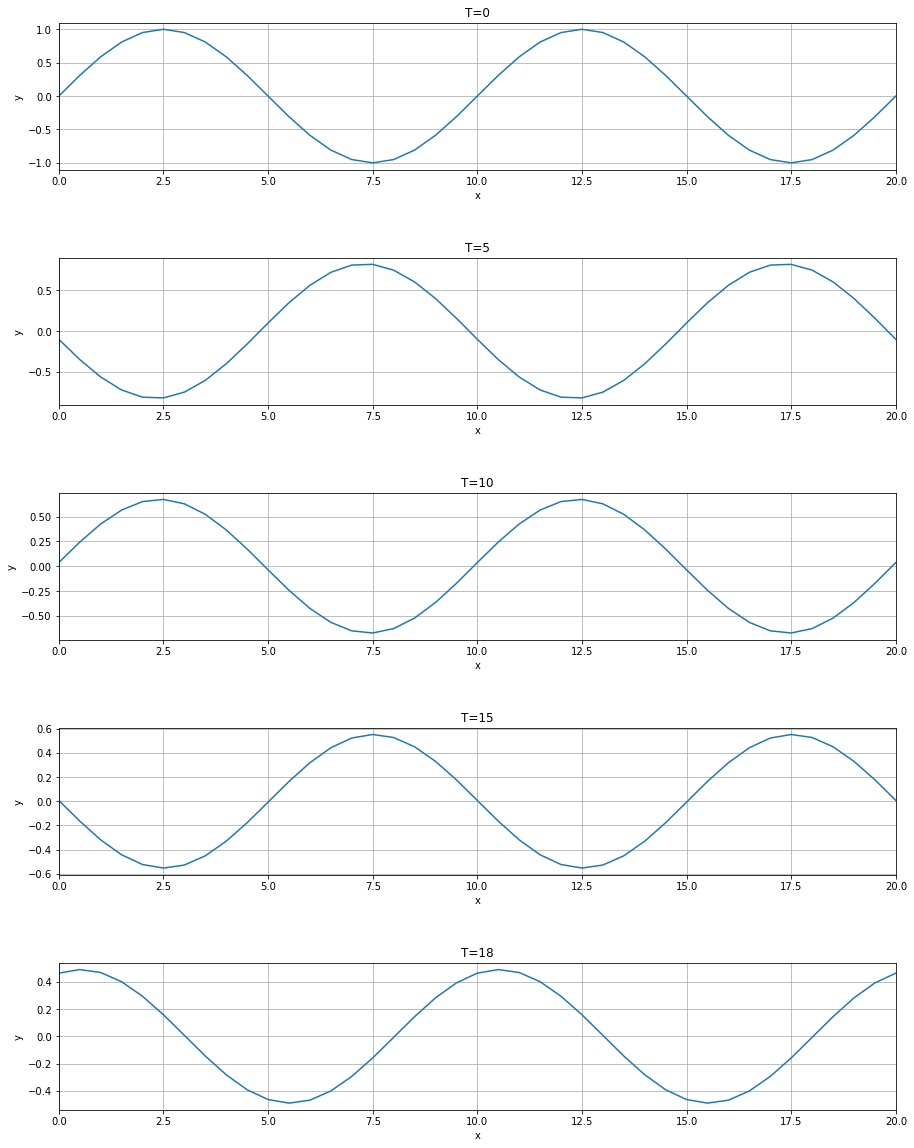

In [ ]:
plot_graph(scheme_1,0.6)

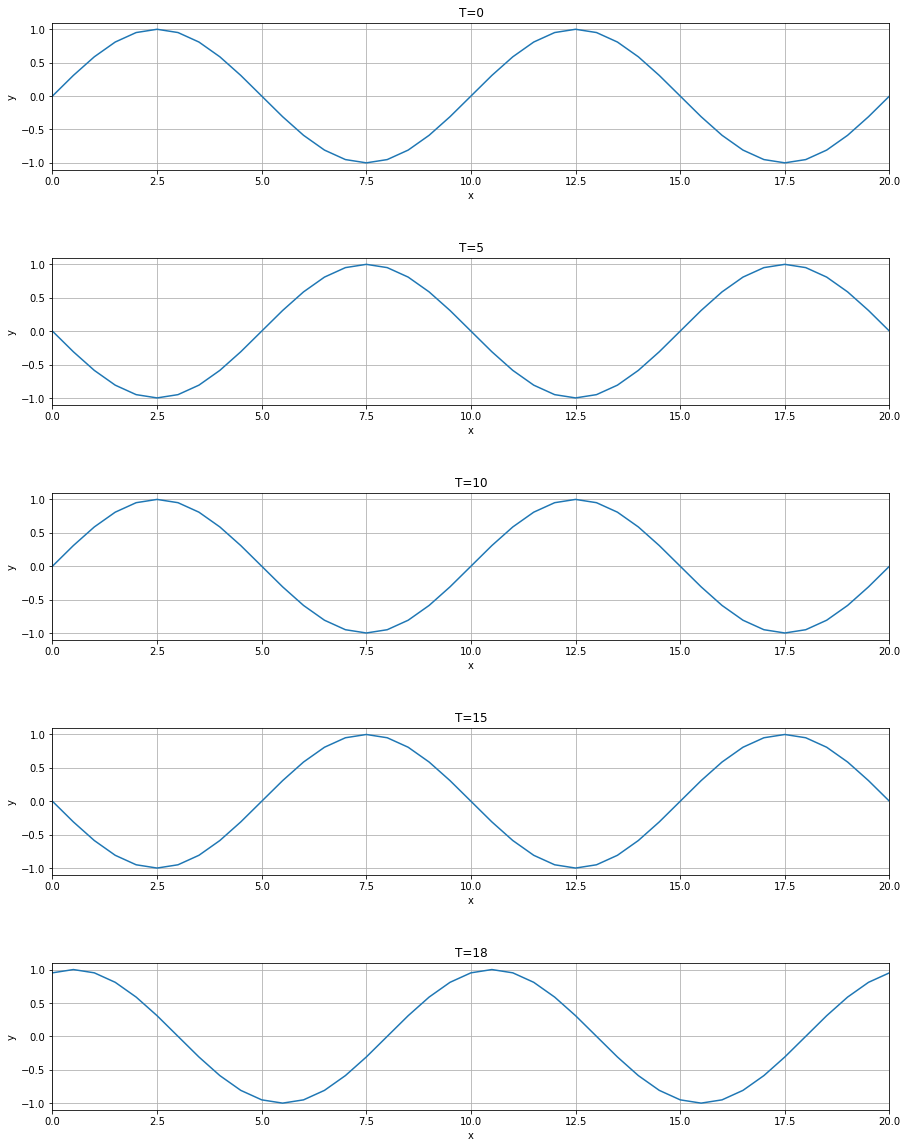

In [ ]:
plot_graph(scheme_1,1)

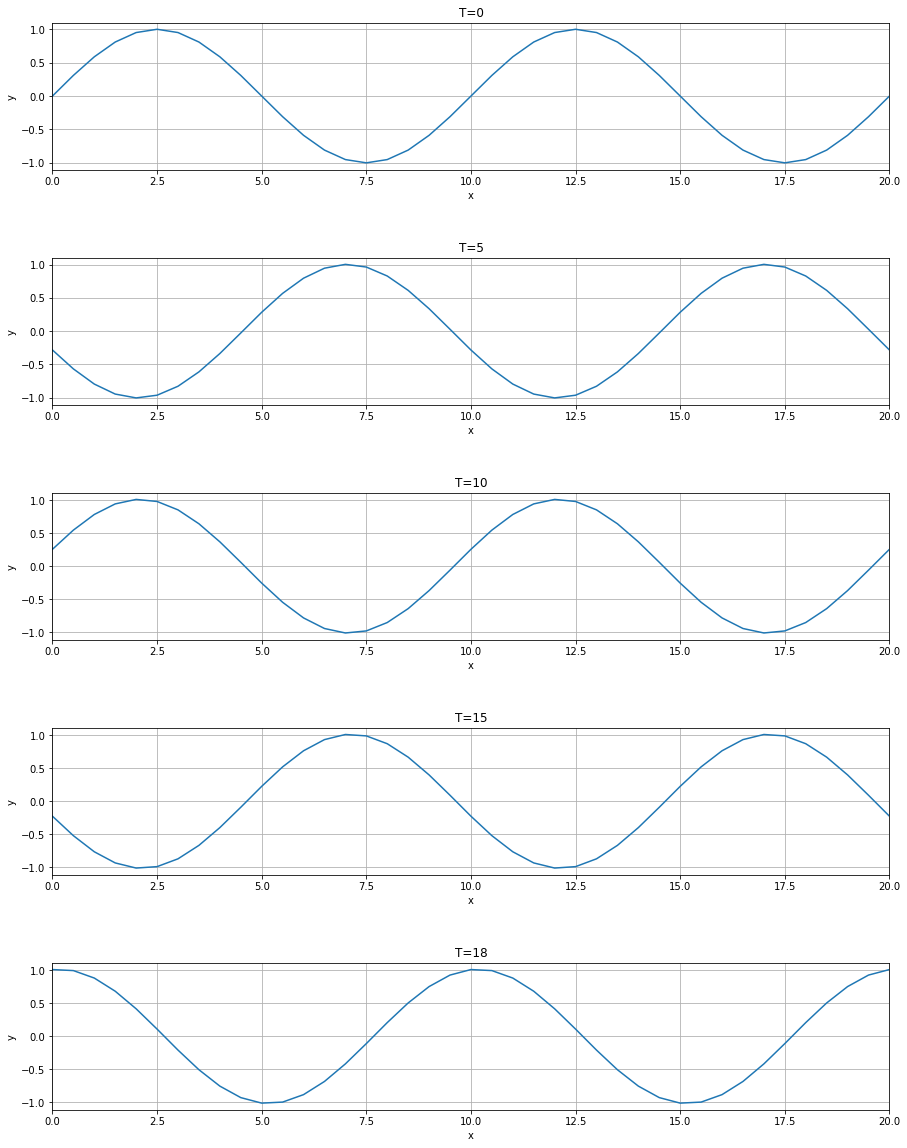

In [ ]:
plot_graph(scheme_1,1.01)

Cхема Лакса–Вендроффа:\
$\frac{y_m^{n+1} - y_m^n}{\tau}+ a\frac{y_{m+1}^n - y_{m-1}^n}{2h} -\frac{a^2\tau}{2} \frac{y_{m+1}^n - 2y_m^n + y_{m-1}^n}{h^2} =0 $\
$y_m^{n+1} =  y_m^n -\tau(a\frac{y_{m+1}^n - y_{m-1}^n}{2h} - \frac{a^2\tau}{2} \frac{y_{m+1}^n - 2y_m^n + y_{m-1}^n}{h^2}) =0 $

In [ ]:
def func(prev, cur, next,tau_k):
    a = 1
    return cur - tau_k*( (a *(next-prev) / (2*h)) - ( ((a**2) * tau_k / 2) * (next - (2*cur) + prev)/(h**2) ) )

def scheme_2(t,x,tau):
    y = np.zeros([len(t), len(x)])
    y[0] = [y_0(x_i) for x_i in x]
    #for x_i in x:
    #  if ((x_i)<= math.pi) and ((x_i)>= 2* math.pi):
    #     y[0][x_i] = 0
    #y[len(t)-1] = [0 for x_i in x] 
    #for i in range(len(x)-1):
    #    y[0][i] = y[-1][i-1]
    for i in range(len(t)-1):
        y[i+1][0] = func(y[i][len(x)-1], y[i][0], y[i][1],tau)
        for j in range(1, len(x)-1):
            y[i+1][j] = func(y[i][j-1], y[i][j], y[i][j+1],tau)
        y[i+1][len(x)-1] = func(y[i][len(x)-2], y[i][len(x)-1], y[i][0],tau)
    return y

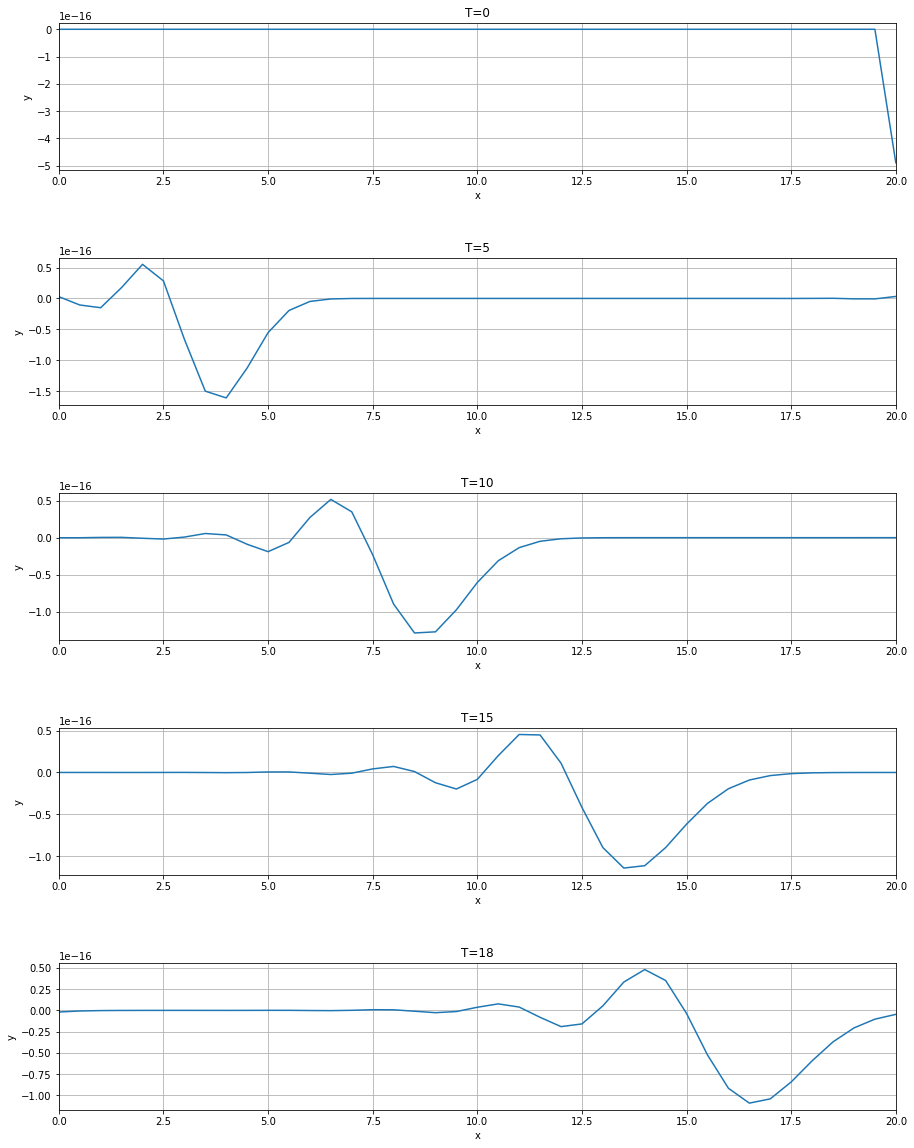

In [ ]:
plot_graph(scheme_2,0.6)

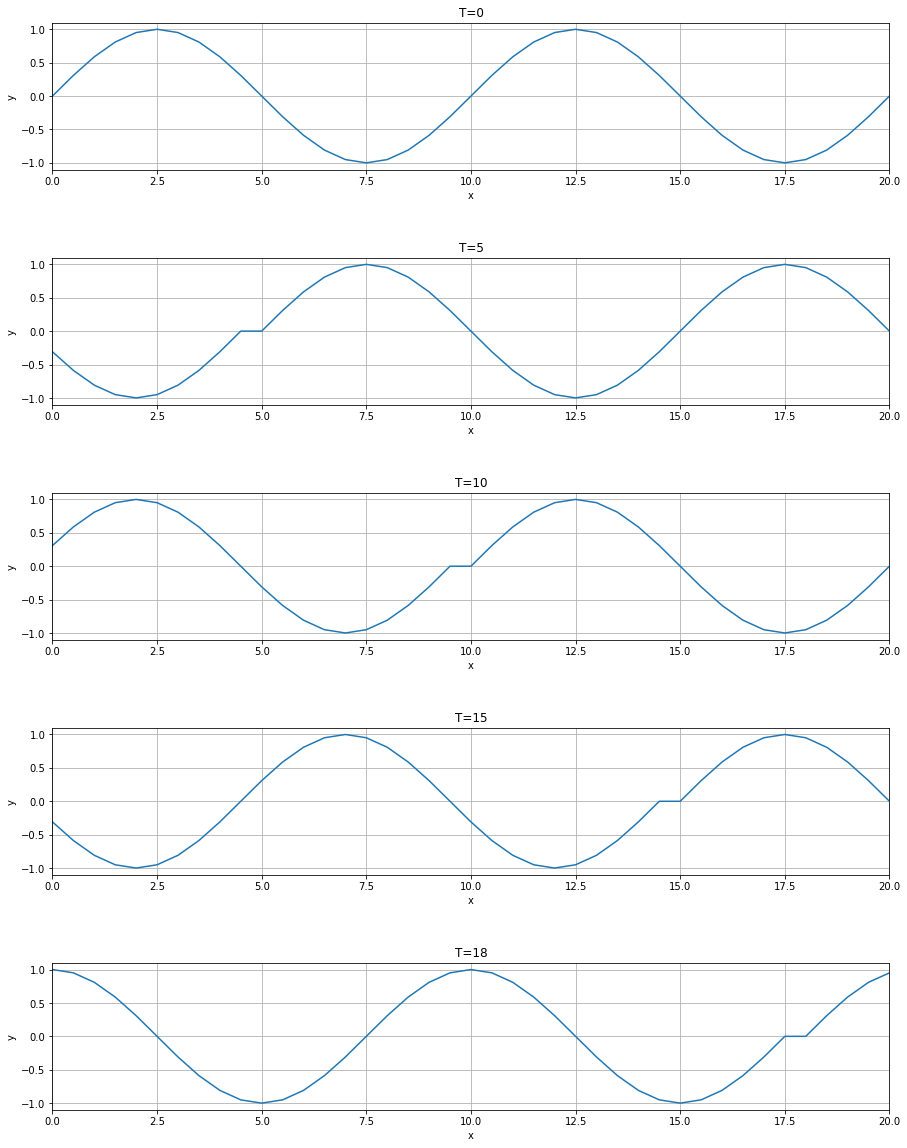

In [ ]:
plot_graph(scheme_2,1)

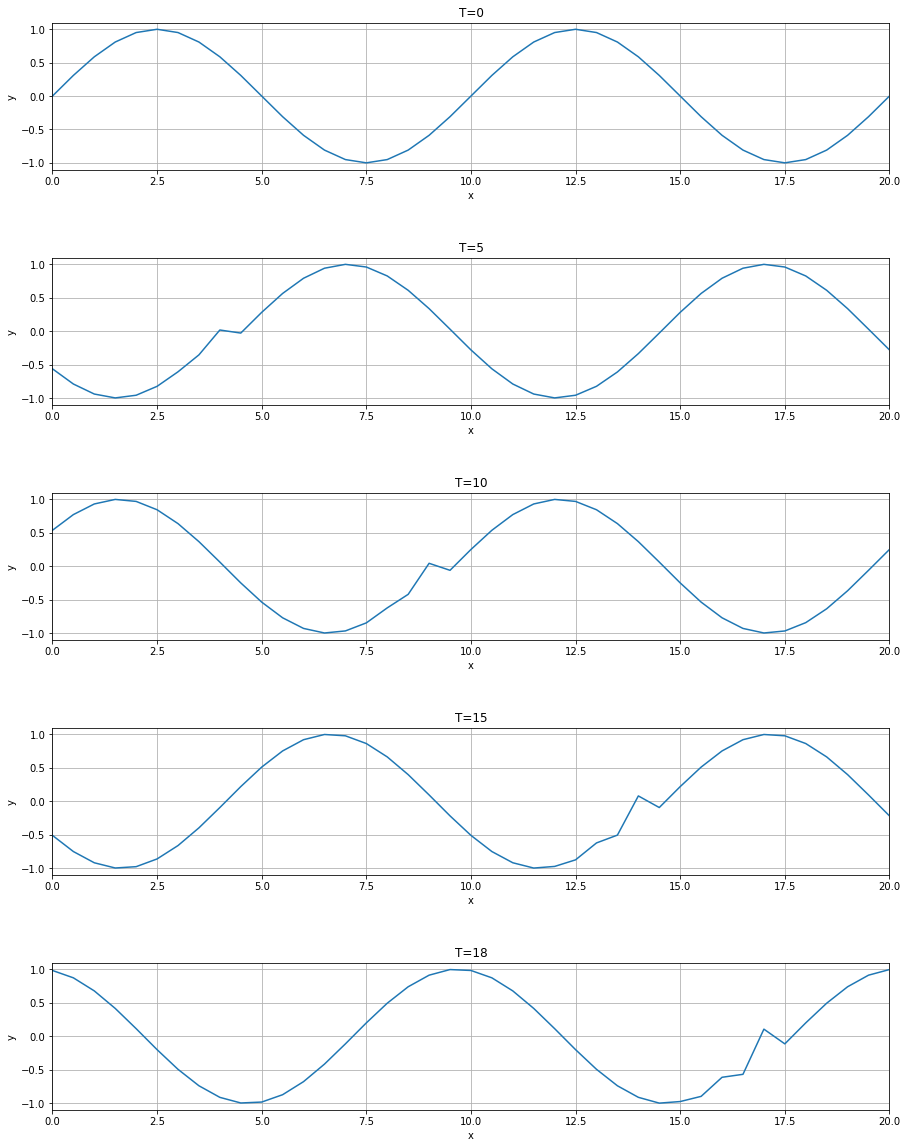

In [ ]:
plot_graph(scheme_2,1.01)